## Softmax Regression으로 MNIST 분류

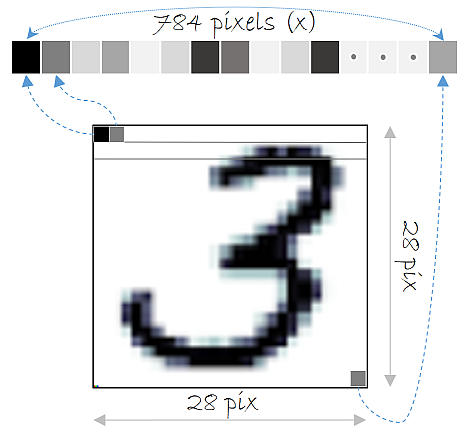

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [4]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print(device)

cpu


- colab에서 하드웨어 가속기로 GPU를 선택하면 GPU를 사용할 수 있다는 것을 알아두자!

In [5]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [10]:
EPOCH = 15
BATCH_SIZE = 100

#### 1. MNIST 분류기 구현

In [9]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                         train=True,
                         transform = transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                        train=False,
                        transform = transforms.ToTensor(),
                        download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [12]:
data_loader = DataLoader(dataset=mnist_train,
                        batch_size = BATCH_SIZE,
                        shuffle = True,
                        drop_last = True)

drop_last는 만약 1000개의 데이터에 대해 batch_size=128로 했을 때 7개가 나오고 나머지로 104개가 남는다. 이를 버리고 싶다면 drop_last를 한다.   
이를 하는 이유는 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아주는 것이다.

In [14]:
#input은 28x28=784, output은 0~9로 10
linear = nn.Linear(784, 10, bias=True).to(device)

In [16]:
cost_function = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [18]:
for epoch in range(EPOCH + 1):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for x,y in data_loader:
        x = x.view(-1, 28*28).to(device)   #batch size=100이므로 x는 (100x284)가 된다.
        y = y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(x)
        cost = cost_function(hypothesis, y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch : ', '%04d' %(epoch + 1), ' Cost : ', '{:.9f}'.format(avg_cost))
                  

Epoch :  0001  Cost :  0.535899699
Epoch :  0002  Cost :  0.359200478
Epoch :  0003  Cost :  0.331210256
Epoch :  0004  Cost :  0.316642910
Epoch :  0005  Cost :  0.306912124
Epoch :  0006  Cost :  0.300341636
Epoch :  0007  Cost :  0.295203745
Epoch :  0008  Cost :  0.290808409
Epoch :  0009  Cost :  0.287419200
Epoch :  0010  Cost :  0.284378737
Epoch :  0011  Cost :  0.281997502
Epoch :  0012  Cost :  0.279780537
Epoch :  0013  Cost :  0.277854115
Epoch :  0014  Cost :  0.276023179
Epoch :  0015  Cost :  0.274494976
Epoch :  0016  Cost :  0.272993028


#### 테스트 데이터를 이용하여 모델 테스트

In [ ]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())
    
    # MNIST 테스트 데이터에서 무작위로 하나르 뽑아서 예측해보기
    r = random.randint(0, len(mnist_test) - 1)
    x_random = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    y_random = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label : ', y_random.item())
    random_prediction = linear(x_random)
    print('Prediction : ', torch.argmax(random_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

C:\Users\jjun8\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\jjun8\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy :  0.8873999714851379
Label :  8
Prediction :  3
